<a href="https://colab.research.google.com/github/lukaszlaszczuk/korona-uczenia-maszynowego/blob/master/cats_vs_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [6]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 21:59:13--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.187.128, 2404:6800:4008:c05::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.187.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  60.1MB/s    in 1.1s    

2019-04-12 21:59:15 (60.1 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall('/tmp')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)

    img = mpimg.imread(img_path)
    plt.imshow(img)

  plt.tight_layout()

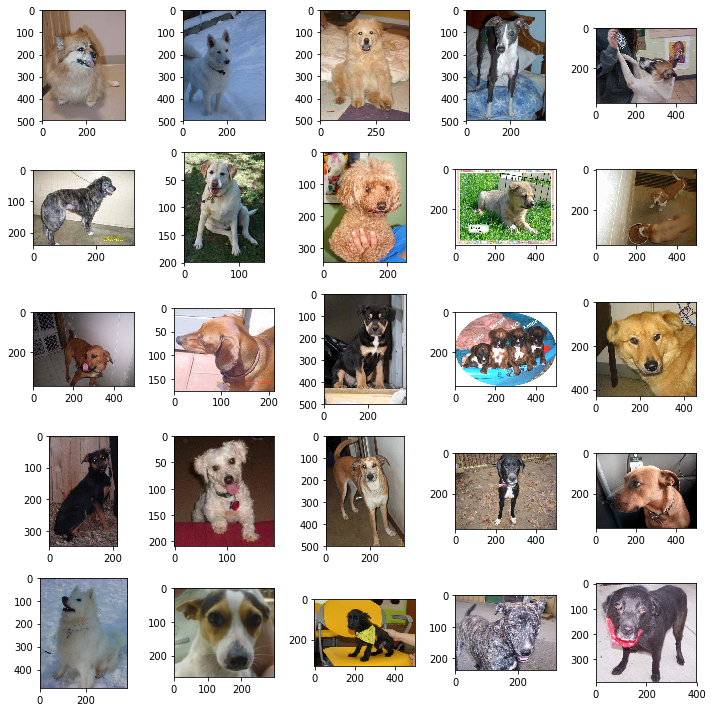

In [10]:
plot_images(train_dogs_dir)


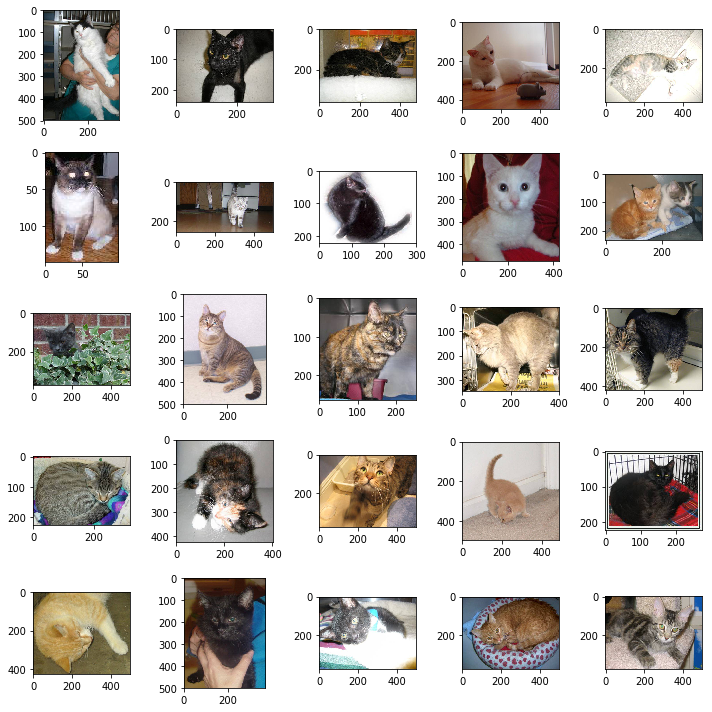

In [23]:
plot_images(train_cats_dir)

In [11]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3, 3), input_shape = input_shape),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2,2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2,2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)             0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255) 

In [13]:
train_generator = train_datagen.flow_from_directory(
         train_dir,
         target_size=(150,150),
         batch_size=20,
         class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
         validation_dir,
         target_size=(150,150),
         batch_size=20,
         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [14]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50/50 [==============================] - 4s 80ms/step - loss: 0.6757 - acc: 0.6490
 - 14s - loss: 0.6896 - acc: 0.5360 - val_loss: 0.6757 - val_acc: 0.6490
Epoch 2/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6027 - acc: 0.6890
 - 11s - loss: 0.6606 - acc: 0.6090 - val_loss: 0.6027 - val_acc: 0.6890
Epoch 3/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6150 - acc: 0.6900
 - 11s - loss: 0.6155 - acc: 0.6810 - val_loss: 0.6150 - val_acc: 0.6900
Epoch 4/5
50/50 [==============================] - 4s 78ms/step - loss: 0.6309 - acc: 0.6750
 - 10s - loss: 0.5754 - acc: 0.6945 - val_loss: 0.6309 - val_acc: 0.6750
Epoch 5/5
50/50 [==============================] - 4s 78ms/step - loss: 0.5642 - acc: 0.7050
 - 11s - loss: 0.5419 - acc: 0.7265 - val_loss: 0.5642 - val_acc: 0.7050
